<h3>1. Sa se scrie formula lui MacLaurin pentru urmatoarea functie:
$f\colon $[-a, $\infty$)$\to \mathbb{R}$ $$f(x) = \sqrt{x + a} \:,\:\: a > 0$$  
</h3>

In [234]:
var('x a')
assume(a > 0)
f(x) = sqrt(x + a)
show(f.taylor(x, 0, 10))

x |--> sqrt(a) + 1/2*x/sqrt(a) - 1/8*x^2/a^(3/2) + 1/16*x^3/a^(5/2) - 5/128*x^4/a^(7/2) + 7/256*x^5/a^(9/2) - 21/1024*x^6/a^(11/2) + 33/2048*x^7/a^(13/2) - 429/32768*x^8/a^(15/2) + 715/65536*x^9/a^(17/2) - 2431/262144*x^10/a^(19/2)

<h3>2. Sa se determine numarul natural n, astfel ca pentru $a = 0$ 
si $f\colon \mathbb{R}\to \mathbb{R}$  $,\:\:f(x) = e^{x},\:\:$
$T_nf$ sa aproximeze $f$ pe intervalul [−1,1] cu 3 zecimale exacte</h3>

In [235]:
var('n')
R_n(n) = 3/factorial(n + 1)
for order in range(1, 200):
    if R_n(order) < 10^(-3):
        print("Order: " + str(order))
        break

Order: 6


<h3>3. Sa se aproximeze $\sqrt[\leftroot{-2}\uproot{2}3]{999}$ cu 12 zecimale exacte</h3>

In [236]:
var('n')
R_n(n) = binomial(1/3, n)*10^(-3*n)
for order in range(1, 2000):
    if abs(R_n(order)) < 10^(-12):
        print("Order: " + str(order))
        break

Order: 4


<h3>4. Dezvoltati functia eroare:  $\:erf(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x}e^{-t^{2}}\, dt,\:$ in serie utilizand seria pentru exponentiala si integrand. Calculati seria Taylor a lui $erf(x)$ in jurul lui zero direct. Sunt cele doua serii identitce? Evaluati $erf(1)$ adunand patru termeni ai seriei si comparati cu valoarea lui $erf(1) \approx 0.8427$, care este data cu patru zecimale exacte</h3>

In [237]:
#Method 1, Taylor Series for e^(-t^2), then integrate
var('t')
assume(t > 0)
exp_t(t) = exp(-t^2) #exp_t(t) = e^(-t^2)
exp_taylor(t) = exp_t.taylor(t, 0, 5) #taylor series for exp_t
erf_taylor_met_1(x) = 2/(sqrt(pi)) * exp_taylor(t).integral(t, 0, x)
print("First method: erf(1) = " + str(RR(erf_taylor_met_1(1))))

First method: erf(1) = 0.865090694773226


In [238]:
#Method 2, Directly calculate Taylor Series
erf_taylor_met_2(x) = erf(x).taylor(x, 0, 5)
print("Second method: erf(1) = " + str(RR(erf_taylor_met_2(1))))
print("Diff between real value 0.8427 and " + str(RR(erf_taylor_met_2(1))) + " is " + str(RR(abs(0.8427 - erf_taylor_met_2(1)))))

Second method: erf(1) = 0.865090694773226
Diff between real value 0.8427 and 0.865090694773226 is 0.0223906947732263


<h3>5. Deduceti seria Taylor pentru $ln(1 + x)$ si aproximati $ln2$ folosind primii 8 termeni. Cati termeni sunt necesari pentru a obtine $ln2$ cu 5 zecimale corecte? La fel pentru $ln\frac{1+x}{1-x}$</h3>

In [239]:
var('x')
assume(x > 0)
ln_taylor(x) = ln(1 + x).taylor(x, 0, 8)
print("ln2 approximation with 8 Taylor series terms: " + str(RR(ln_taylor(2))))

ln2 approximation with 8 Taylor series terms: -19.3142857142857


In [240]:
#Order of taylor series to approximate ln 2 with 5 decimals 
var('n')
assume(n > 0)
R_n(n) = 1/(n + 1)
order = 1
while True:
    if abs(R_n(order)) < 10^(-5):
        print("Order: " + str(order))
        break
    order += 1

Order: 100000


In [241]:
#ln2 approximation using taylor series of ln((1+x)/(1-x))
var('x')
R_n(n) = 1/(3^n)*(2*(n + 1))
order = 1
while True:
    if abs(R_n(order)) < 10^(-5):
        print("Order: " + str(order))
        break
    order += 1

Order: 14


<h3>6. Deduceti seria Taylor pentru $arctan$. Cati termeni sunt necesari pentru a obtine  $\pi/4$ cu 5 zecimale exacte </h3>

In [242]:
var('x')
R_n(n) = 1/(2*n + 1)
order = 1
while True:
    if R_n(order) < 10^(-5):
        print("Order: " + str(order))
        break
    order += 1
arctg_taylor(x) = arctan(x).taylor(x, 0, order)
print("Pi approximation with 5 decimals: " + str(RR(arctg_taylor(1))))
print("Difference between pi/4 and approximation? " +  str(RR(abs(arctg_taylor(1) - pi/4)) < 10^(-5)))

Order: 50000
Pi approximation with 5 decimals: 0.785388163397452
Difference between pi/4 and approximation? True


<h3>7. (Aproximare cu serii Maclaurin) O functie $f \in C^m[a, b]$ se poate aproxima, utilizand seria Maclaurin truchiata, printr-un polinom de grad n $$\sum_{i=0}^{n} c_i x^i$$ unde $c_i = \frac{f^{(i)}(0)}{i!}$</h3>

In [243]:
var('x')
def maclaurinTrunc(f, order):
    """
    Function which will calculate the maclaurin polynomial for a given function
    """
    return sum([(derivative(f, x, i)(x=0)/factorial(i))*x^i for i in range(order + 1)])

In [244]:
#Compute T2f(x)...T5f(x) for e^x
T2f(x) = maclaurinTrunc(exp(x), 2)
T3f(x) = maclaurinTrunc(exp(x), 3)
T4f(x) = maclaurinTrunc(exp(x), 4)
T5f(x) = maclaurinTrunc(exp(x), 5)

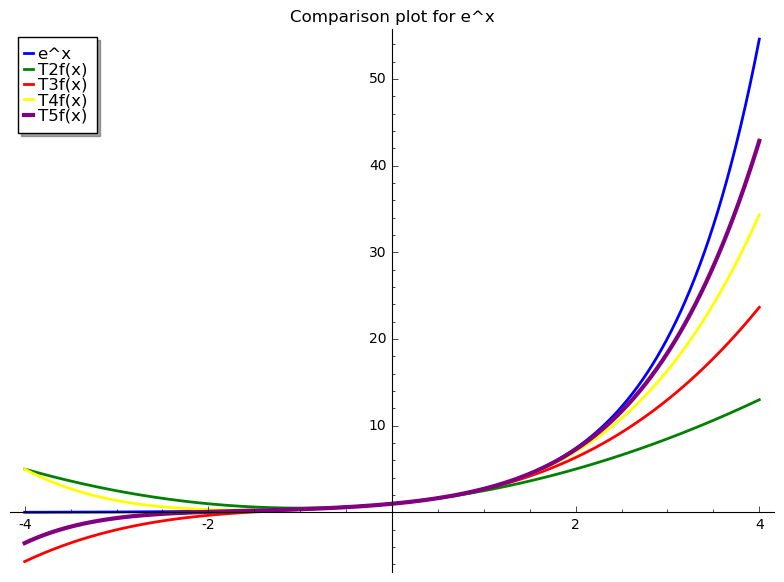

In [245]:
p1 = plot(exp(x), (x, -4, 4), thickness=2, title='Comparison plot for e^x', legend_label='e^x')
p2 = plot(T2f, (x, -4, 4), thickness=2, color='green', legend_label = 'T2f(x)')
p3 = plot(T3f, (x, -4, 4), thickness=2, color='red', legend_label='T3f(x)')
p4 = plot(T4f, (x, -4, 4), thickness=2, color='yellow', legend_label='T4f(x)')
p5 = plot(T5f, (x, -4, 4), thickness=3, color='purple', legend_label='T5f(x)')
p1 + p2 + p3 + p4 + p5

In [246]:
#Compute T2f(x)...T5f(x) for ln(1 + x)
T2f(x) = maclaurinTrunc(ln(1 + x), 2)
T3f(x) = maclaurinTrunc(ln(1 + x), 3)
T4f(x) = maclaurinTrunc(ln(1 + x), 4)
T5f(x) = maclaurinTrunc(ln(1 + x), 5)

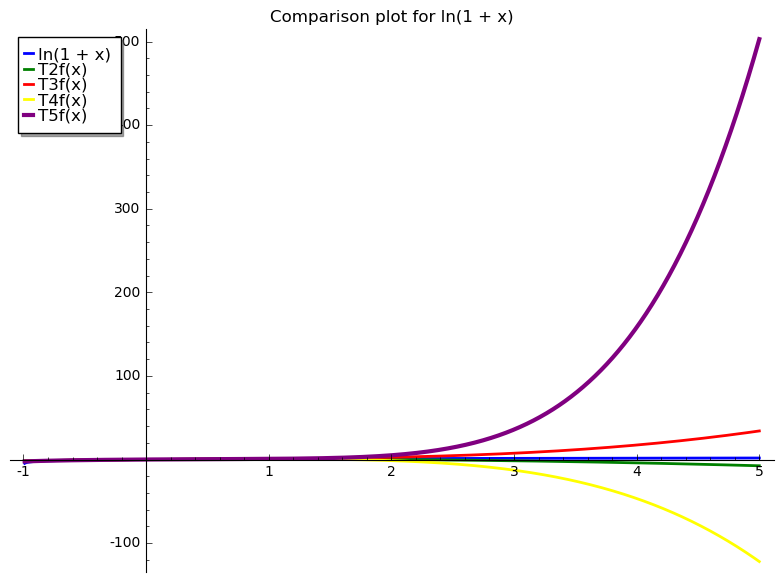

In [247]:
p1 = plot(ln(1 + x), (x, -0.99, 5), thickness=2, title='Comparison plot for ln(1 + x)', legend_label='ln(1 + x)')
p2 = plot(T2f, (x, -0.99, 5), thickness=2, color='green', legend_label = 'T2f(x)')
p3 = plot(T3f, (x, -0.99, 5), thickness=2, color='red', legend_label='T3f(x)')
p4 = plot(T4f, (x, -0.99, 5), thickness=2, color='yellow', legend_label='T4f(x)')
p5 = plot(T5f, (x, -0.99, 5), thickness=3, color='purple', legend_label='T5f(x)')
p1 + p2 + p3 + p4 + p5

<h3>8. (Aproximare Pade rationala). Aproximarea Pade rationala este cea mai buna aproximare a unei functii printr-o functie rationala de ordin $(m, k)$ dat care reproduce valorile functiei si derivateleor ei pana la ordinul $m + k$. Adesea da aproximari mai bune decat seriile Taylor trunchiate si uneori lucreaza chiar si atunci cand seria Taylor nu converge! Forma aproximarii: $$f(x) \approx \frac{p_m(x)}{q_k(x)} = \frac{\sum_{i=0}^{m}a_ix^i}{\sum_{j=0}^{k}b_jx^j}= R_{m,k}(x)$$</h3>

In [274]:
def pade(f, m, k):
    """
    Function for pade rational approximation
    :param: f - function to be approximated
    :m: - order of the frist polynomial
    :k: - order of the second polynomial
    :return: - function representing pade's approximation
    """
    c = [derivative(f, x, i)(x = 0)/factorial(i) for i in range(m + k + 1)]
    
    C = matrix.toeplitz([c[m + i] for i in range(k)], [c[m - i] if m - i > 0 else 0 for i in range(1, k)])
    print(C)
    C = []
    for i in range(m, m + k):
        C.append([c[i - j] if i - j > 0 else 0 for j in range(k)])
    C = matrix(C)
    print(C)
    R = vector([-c[i] for i in range(m + 1, m + k + 1)])
    B = C.solve_right(R)
    B_coeff = [1] + [elem for elem in B]
    if m > k:
        for i in range(k + 1, m + 1):
            B_coeff.append(0)
    B = vector(B_coeff)
    A = [
            sum([c[j - l] * B[l] for l in range(j + 1)])
            for j in range(m + 1)
    ]
    
    return sum([A[i]*x^i for i in range(m + 1)])/sum([B[i]*x^i for i in range(k + 1)])
pade(bessel_J(0, 2*x), 2, 4)

[ -1   0   0   0]
[  0  -1   0   0]
[1/4   0  -1   0]
[  0 1/4   0  -1]
[ -1   0   0   0]
[  0  -1   0   0]
[1/4   0  -1   0]
[  0 1/4   0  -1]


-36*(3*x^2 - 4)/(5*x^4 + 36*x^2 + 144)

In [256]:
#Computing Pade's approximations of e^x
R11(x) = pade(exp(x), 1, 1)
R22(x) = pade(exp(x), 2, 2)

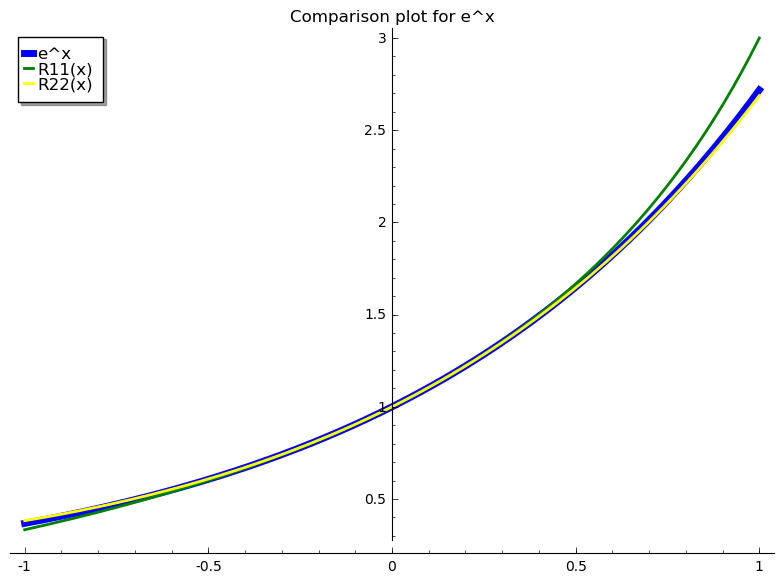

In [257]:
p1 = plot(exp(x), (x, -1, 1), thickness=5, title='Comparison plot for e^x', legend_label='e^x')
p2 = plot(R11(x), (x, -1, 1), thickness=2, color='green', legend_label = 'R11(x)')
p3 = plot(R22(x), (x, -1, 1), thickness=2, color='yellow', legend_label = 'R22(x)')

p1 + p2 + p3

In [258]:
#Computing Pade's approximations of ln(1 + x)
R22(x) = pade(ln(1 + x), 2, 2)
R31(x) = pade(ln(1 + x), 3, 1)

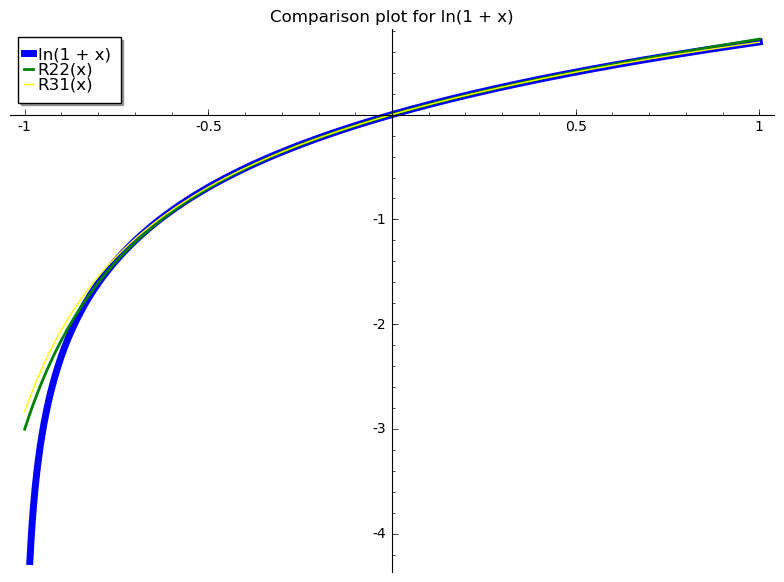

In [259]:
p1 = plot(ln(1 + x), (x, -1, 1), thickness=5, title='Comparison plot for ln(1 + x)', legend_label='ln(1 + x)')
p2 = plot(R22(x), (x, -1, 1), thickness=2, color='green', legend_label = 'R22(x)')
p3 = plot(R31(x), (x, -1, 1), thickness=1, color='yellow', legend_label = 'R31(x)')

p1 + p2 + p3

<h3>9. Calculati dezvolatrea Maclaurin a functiie Bessel $J_0(2x)$. Determinati $R_{2,2}(x), R_{4,3}(x)$ si $R_{2,4}(x)$ si comparati graficele. Functiile Bessel $J_n$ se definesc prin $$J_n(x) = \frac{1}{\pi}\int_{0}^{\pi}cos(xsin\theta - n\theta) d\theta$$</h3>

In [265]:
#Compute Pade's approximations for the Bessel Function
R22(x) = pade(bessel_J(0, 2*x), 2, 2)
R43(x) = pade(bessel_J(0, 2*x), 4, 3)
R24(x) = pade(bessel_J(0, 2*x), 2, 4)

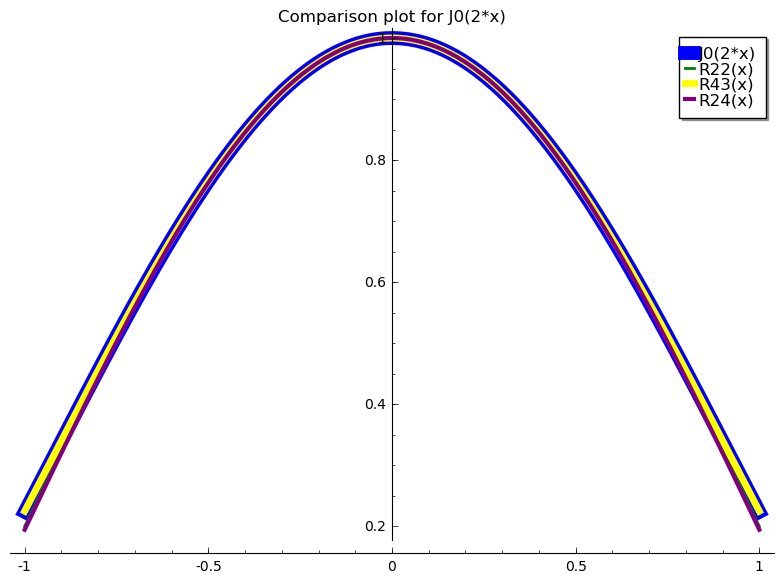

In [266]:
p1 = plot(bessel_J(0, 2*x), (x, -1, 1), thickness=10, title='Comparison plot for J0(2*x)', legend_label='J0(2*x)')
p2 = plot(R22(x), (x, -1, 1), thickness=2, color='green', legend_label = 'R22(x)')
p3 = plot(R43(x), (x, -1, 1), thickness=5, color='yellow', legend_label = 'R43(x)')
p4 = plot(R24(x), (x, -1, 1), thickness=3, color='purple', legend_label = 'R24(x)')

p1 + p2 + p3 + p4 